In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.neighbors import KNeighborsClassifier
import ds_functions as ds


 HF_balanced


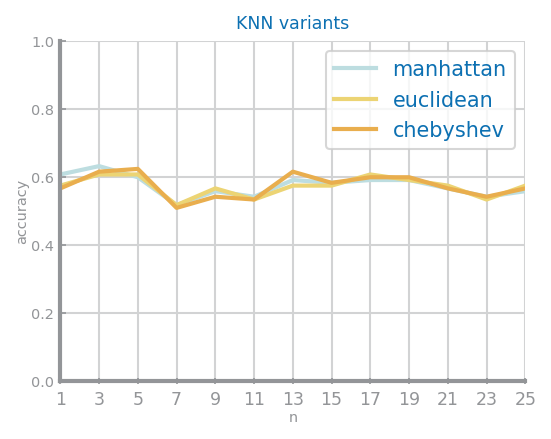

Best results with 3 neighbors and manhattan
An acc of 0.63%

 HF_S_FAnova_extra_outlierTrim_IQS_B


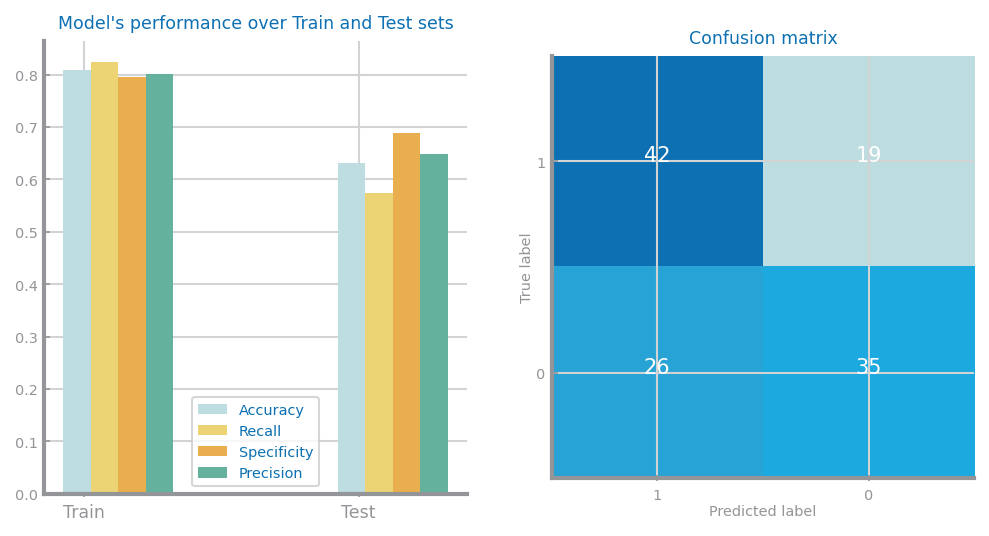

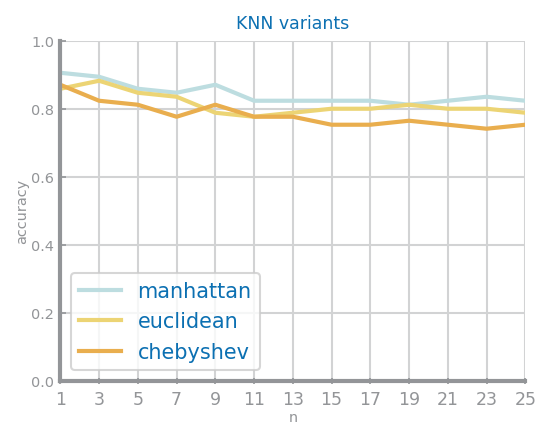

Best results with 1 neighbors and manhattan
An acc of 0.91%

 HF_S_FAnova_outlierTrim_IQS_B


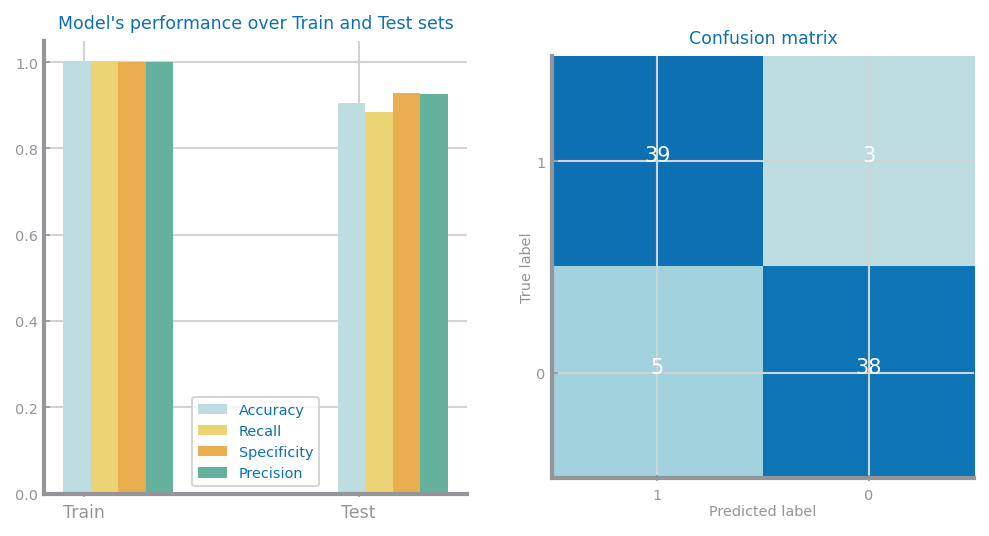

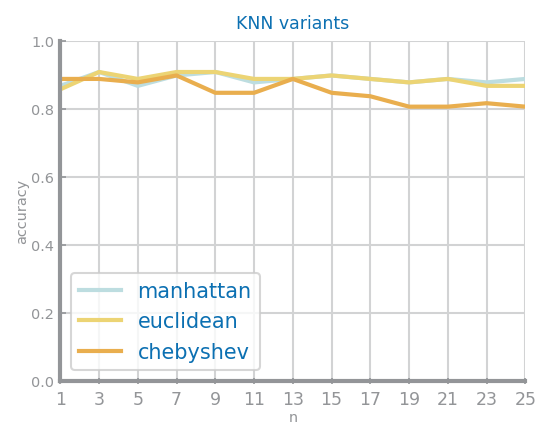

Best results with 3 neighbors and manhattan
An acc of 0.91%

 HR_standardized_anova


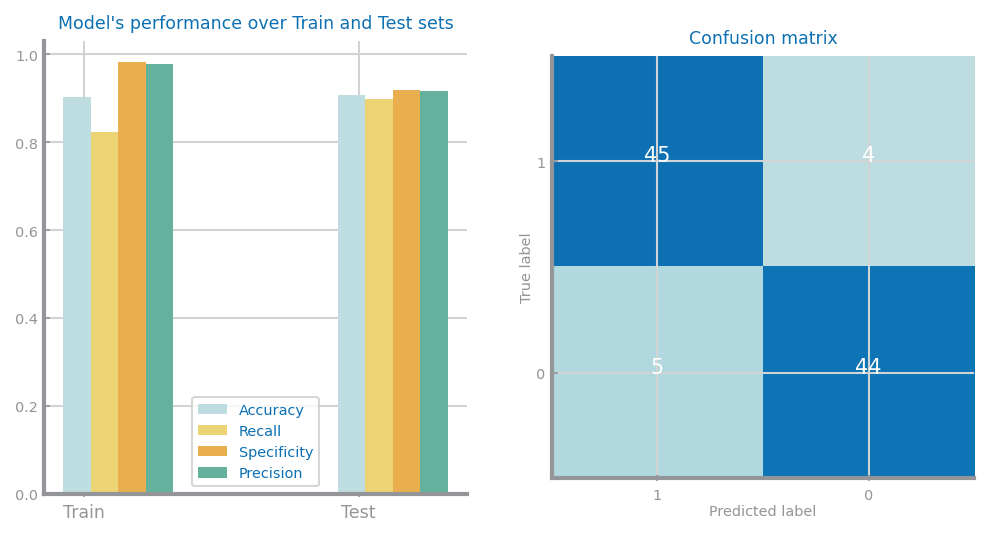

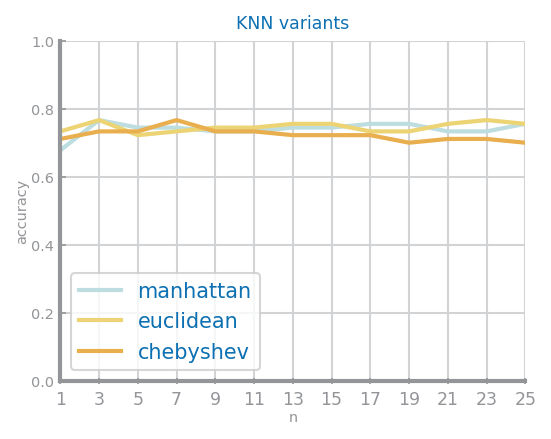

Best results with 3 neighbors and manhattan
An acc of 0.77%

 HR_standardized_corr


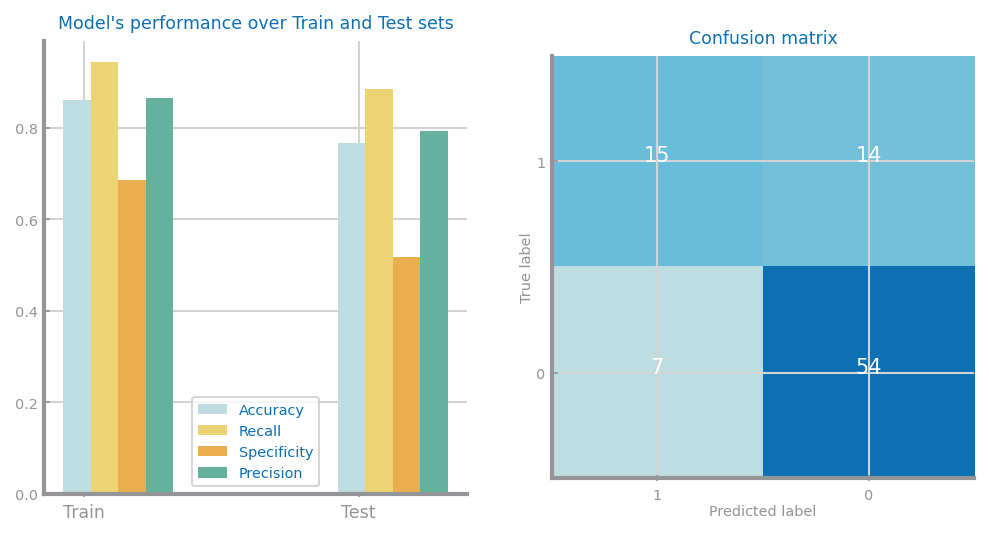

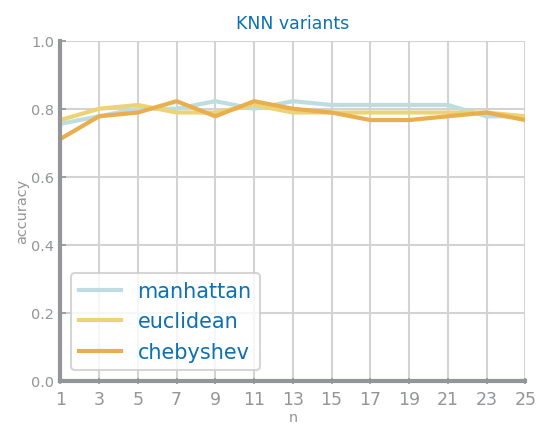

Best results with 9 neighbors and manhattan
An acc of 0.82%

 HR_standardized_extra


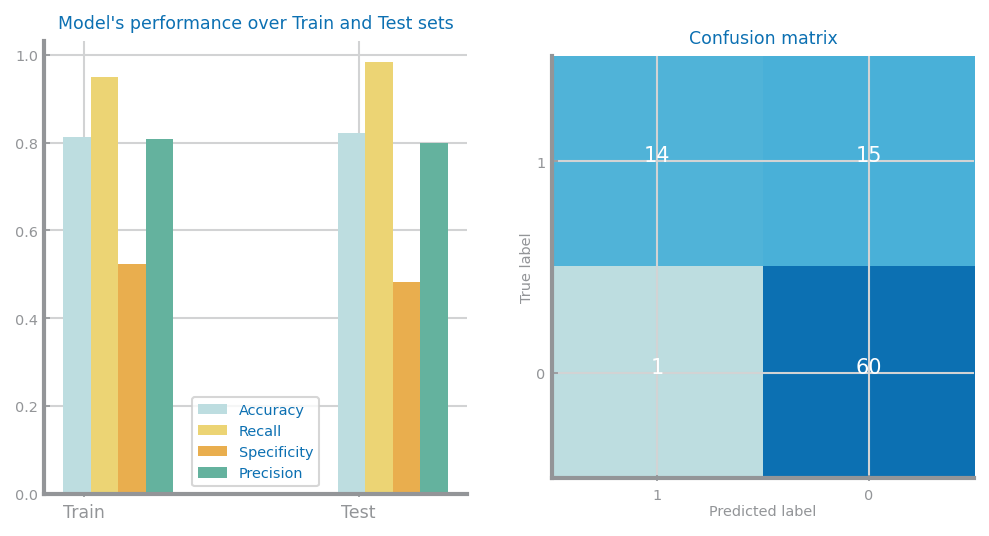

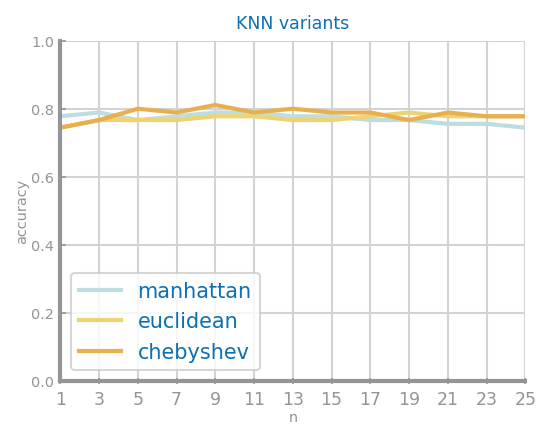

Best results with 9 neighbors and chebyshev
An acc of 0.81%

 HR_standardized_extraTreeClassifier


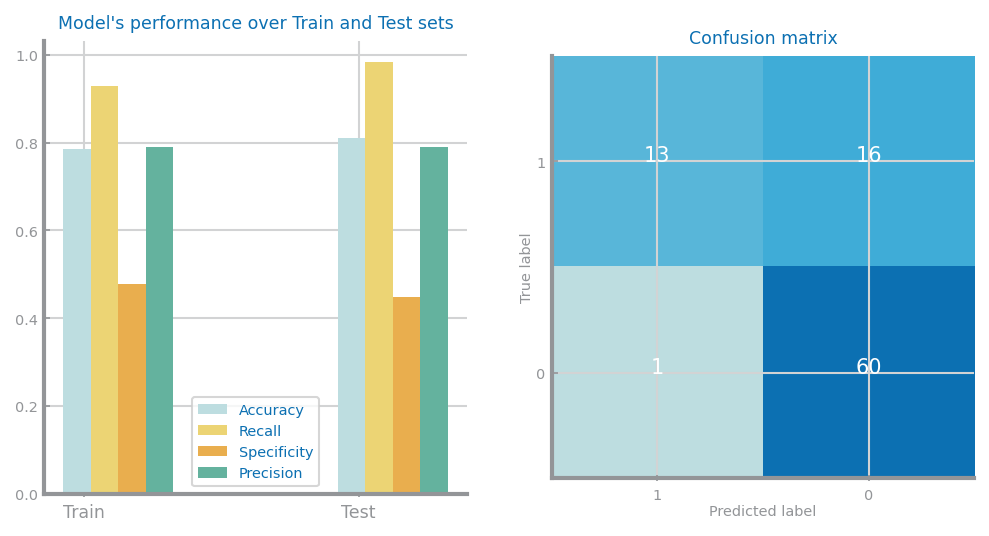

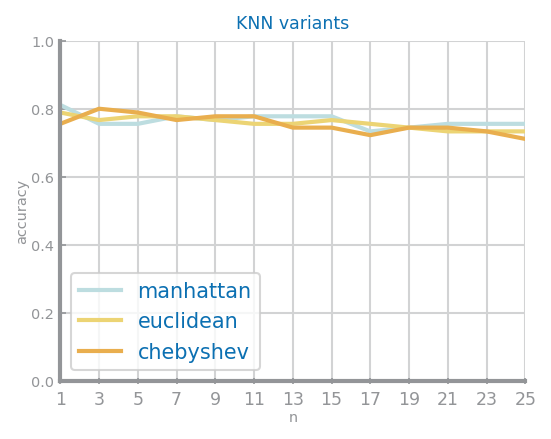

Best results with 1 neighbors and manhattan
An acc of 0.81%

 HR_standardized_extra_anova


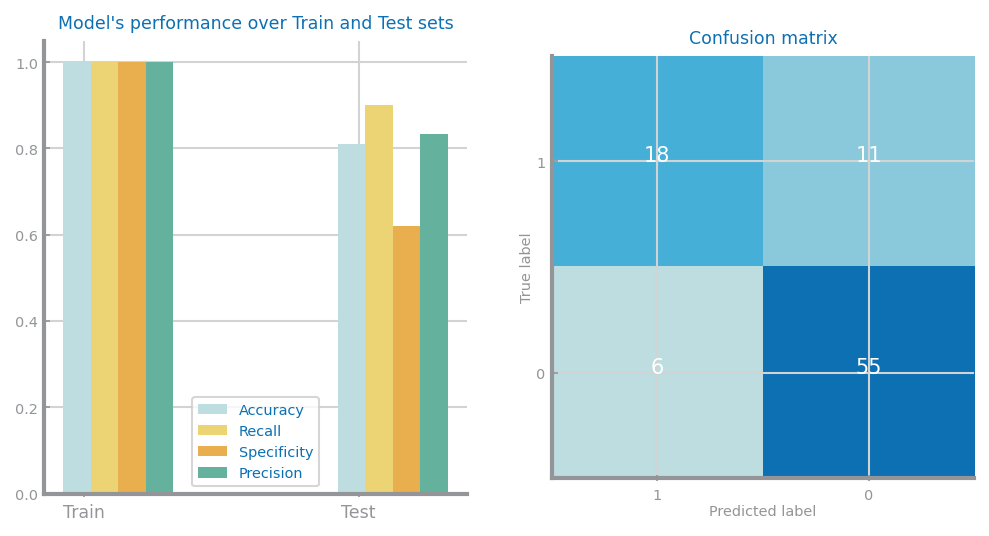

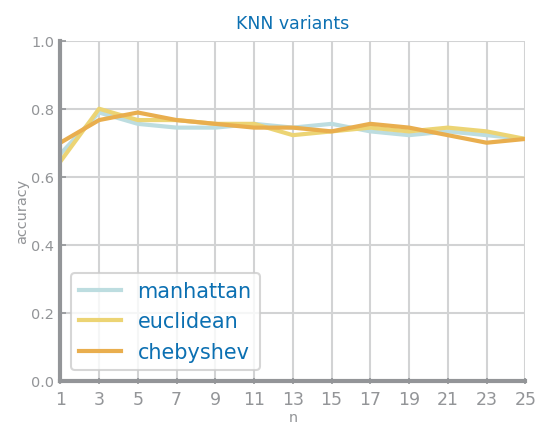

Best results with 3 neighbors and euclidean
An acc of 0.80%

 HR_standardized_extra_lasso


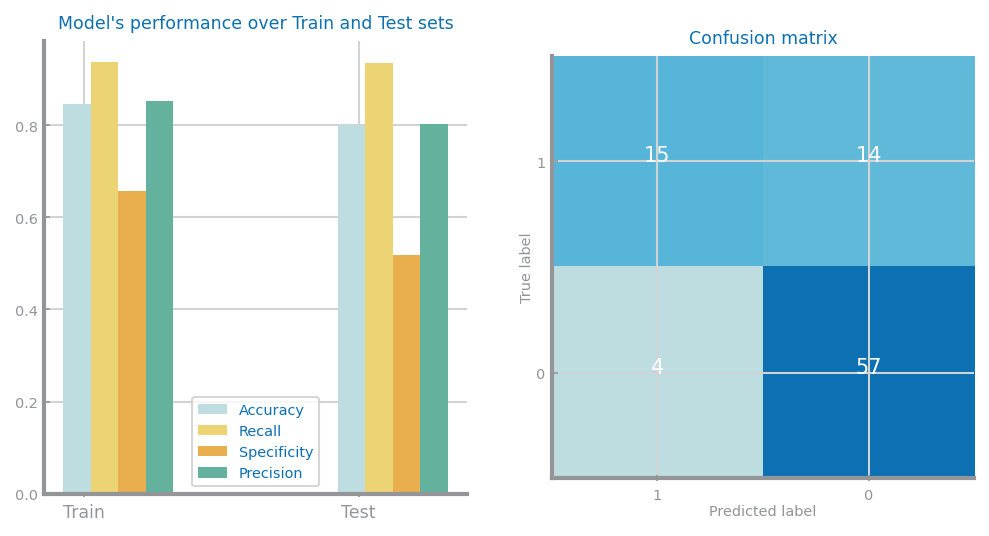

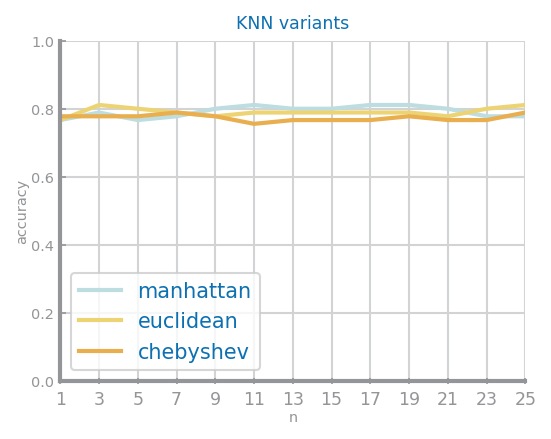

Best results with 11 neighbors and manhattan
An acc of 0.81%

 HR_standardized_extra_mixed


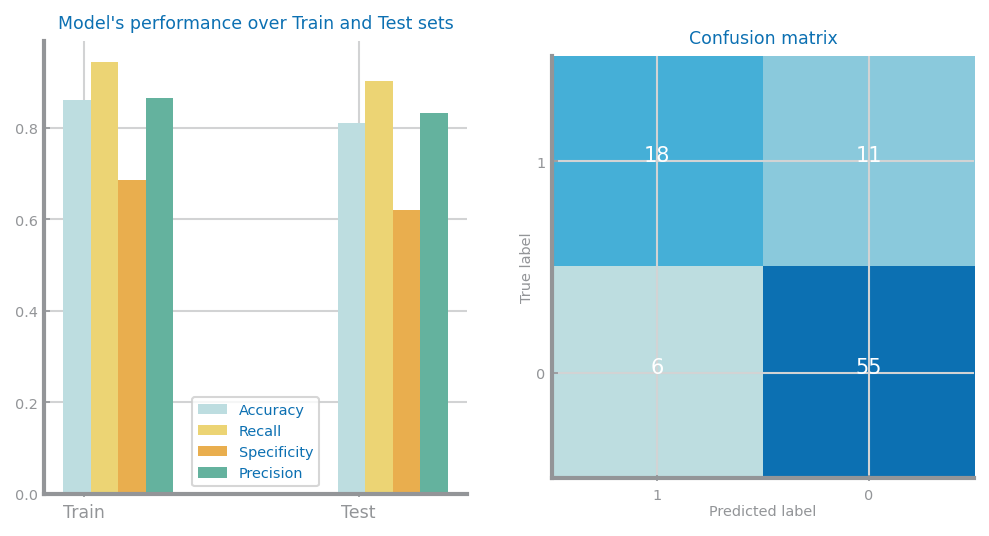

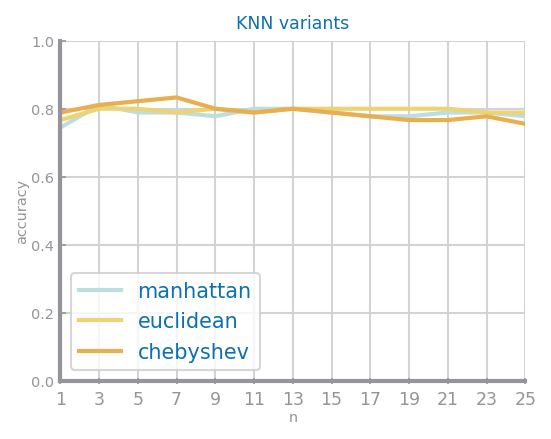

Best results with 7 neighbors and chebyshev
An acc of 0.83%

 HR_standardized_extra_rfe


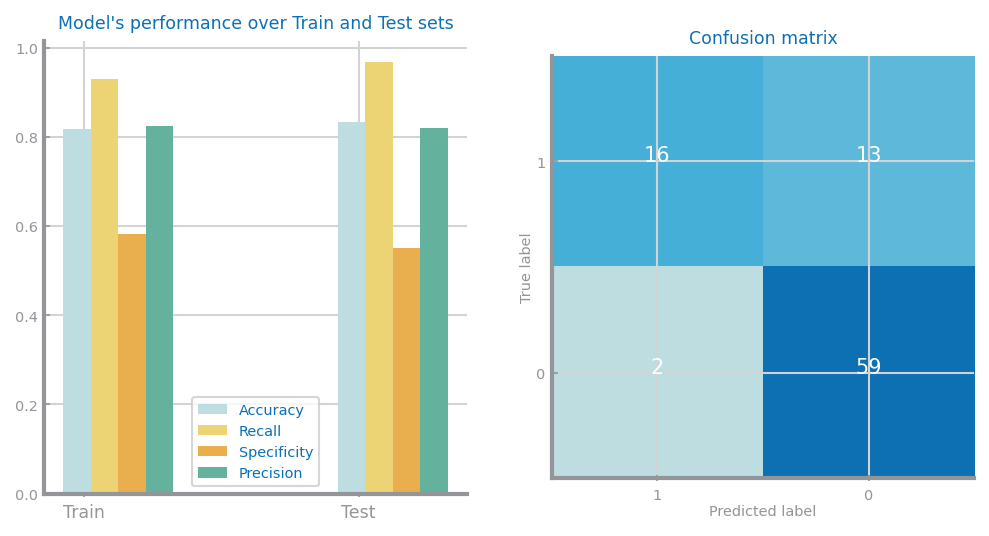

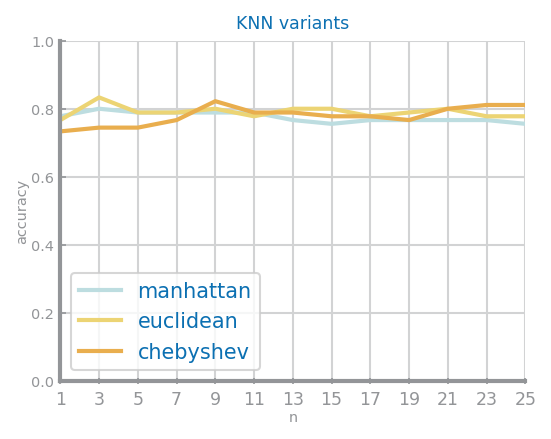

Best results with 3 neighbors and euclidean
An acc of 0.83%

 HR_standardized_lasso


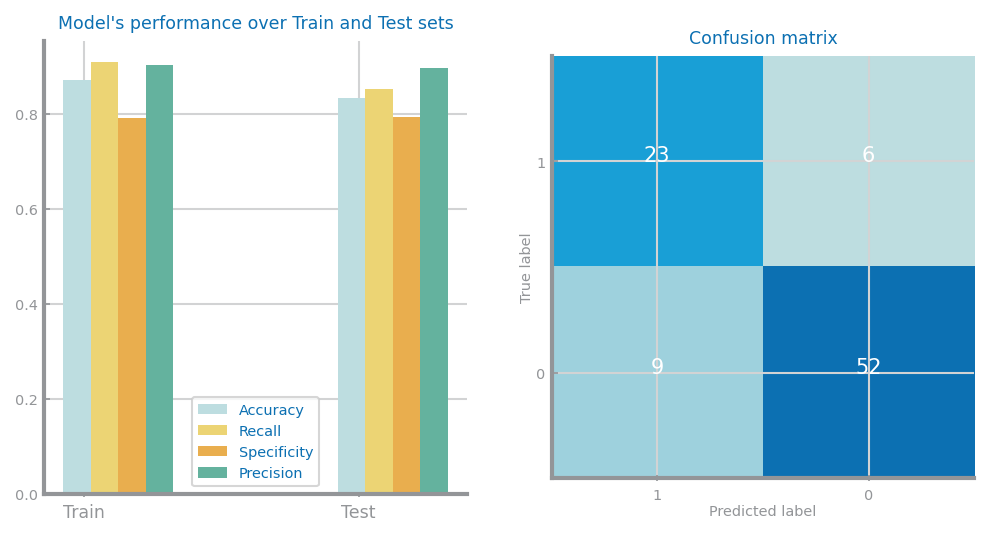

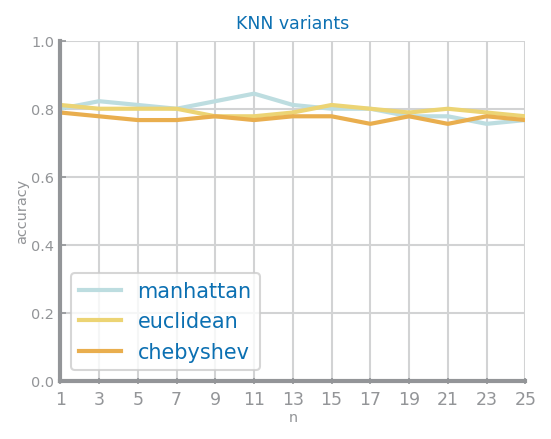

Best results with 11 neighbors and manhattan
An acc of 0.84%

 HR_standardized_mixed


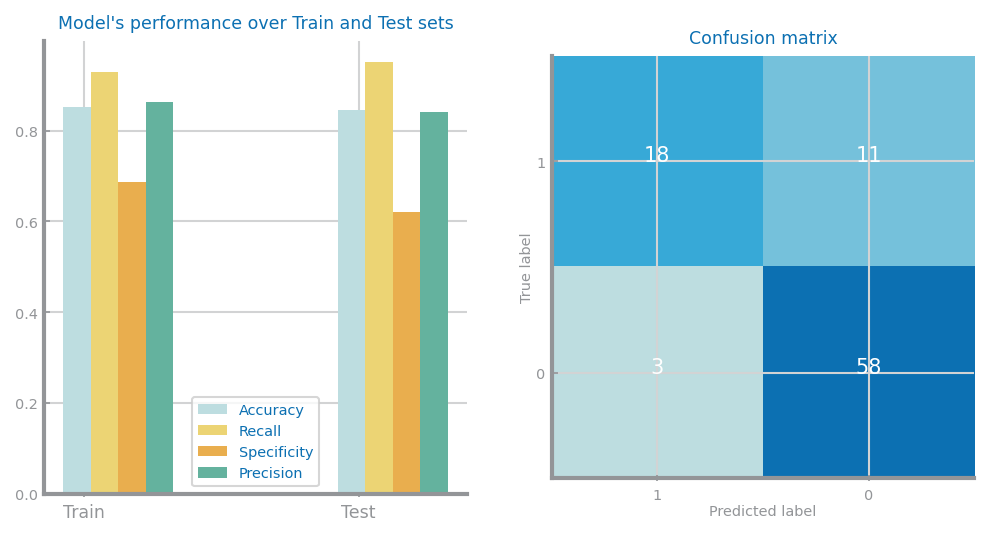

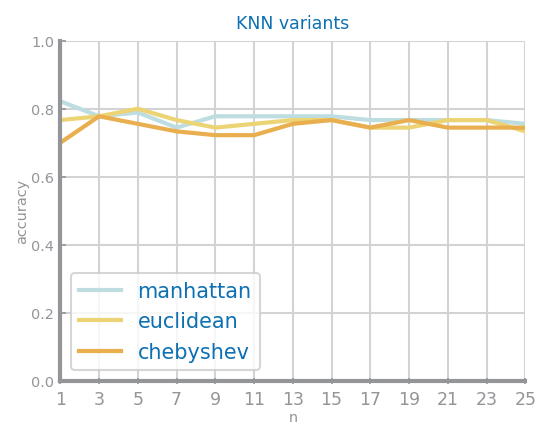

Best results with 1 neighbors and manhattan
An acc of 0.82%

 HR_standardized_rfe


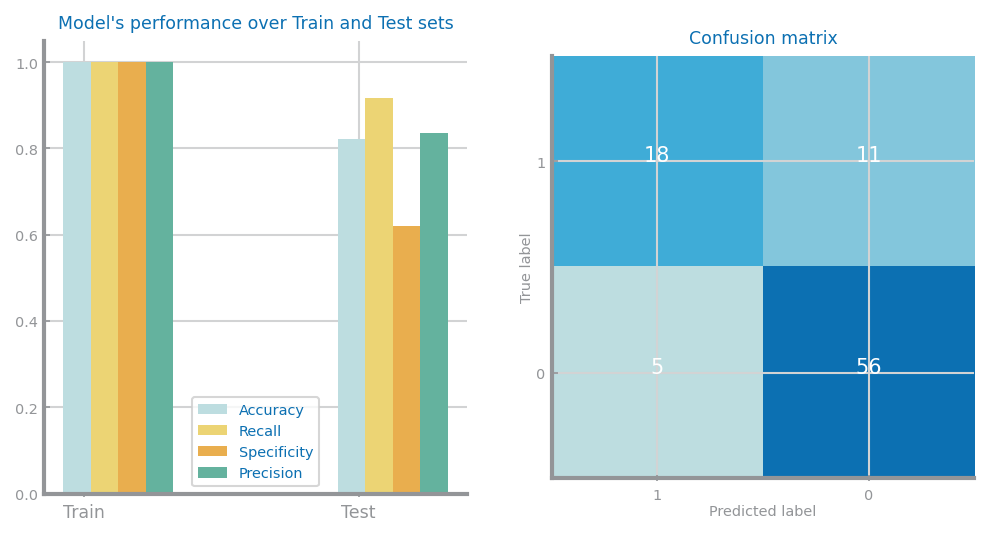

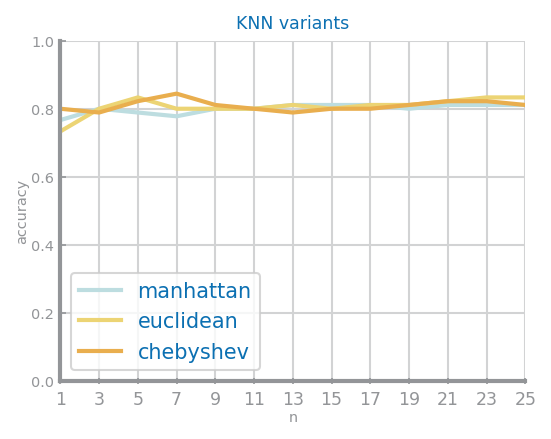

Best results with 7 neighbors and chebyshev
An acc of 0.84%

 HR_S_FCorr_extra_outlierTrim_IQS_B


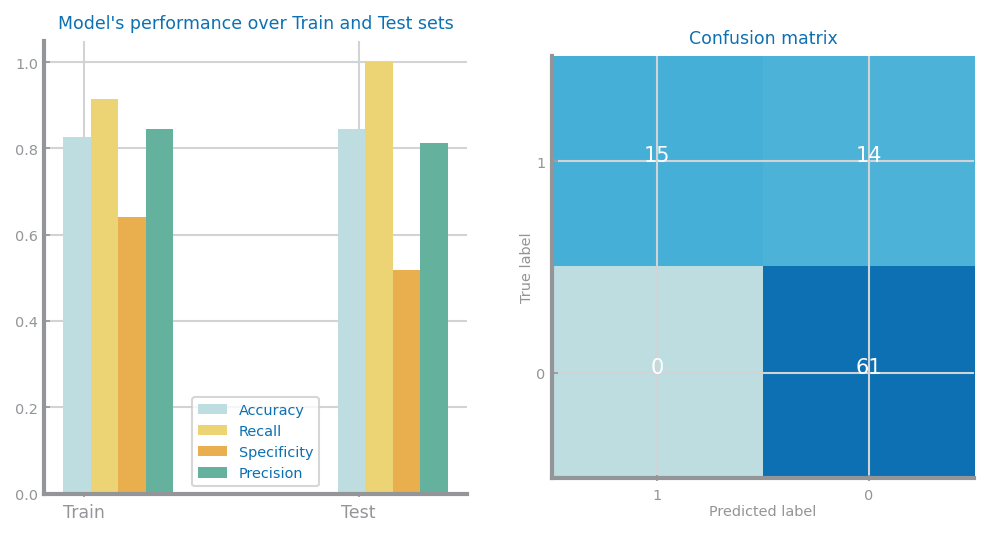

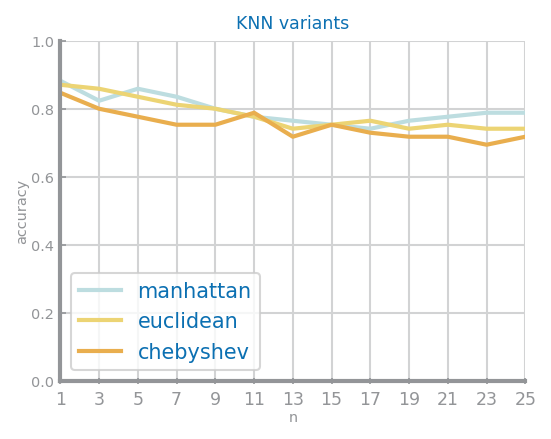

Best results with 1 neighbors and manhattan
An acc of 0.88%

 HR_S_FCorr_outlierTrim_IQS_B


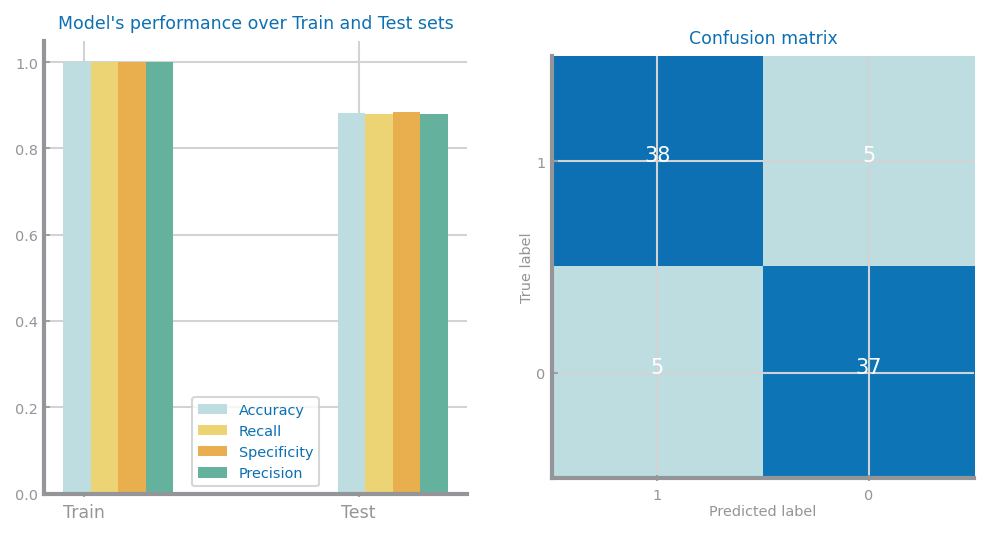

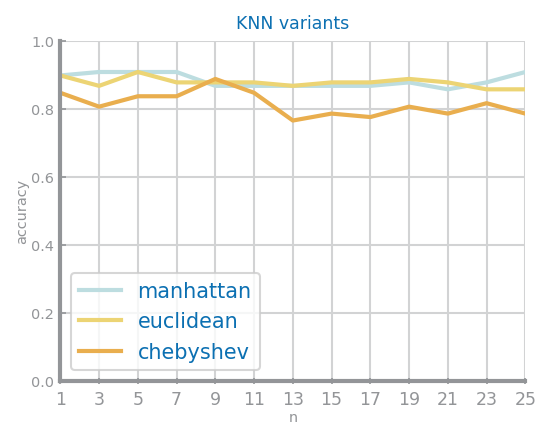

Best results with 3 neighbors and manhattan
An acc of 0.91%

 HR_S_FImp_extra_outlierTrim_IQS_B


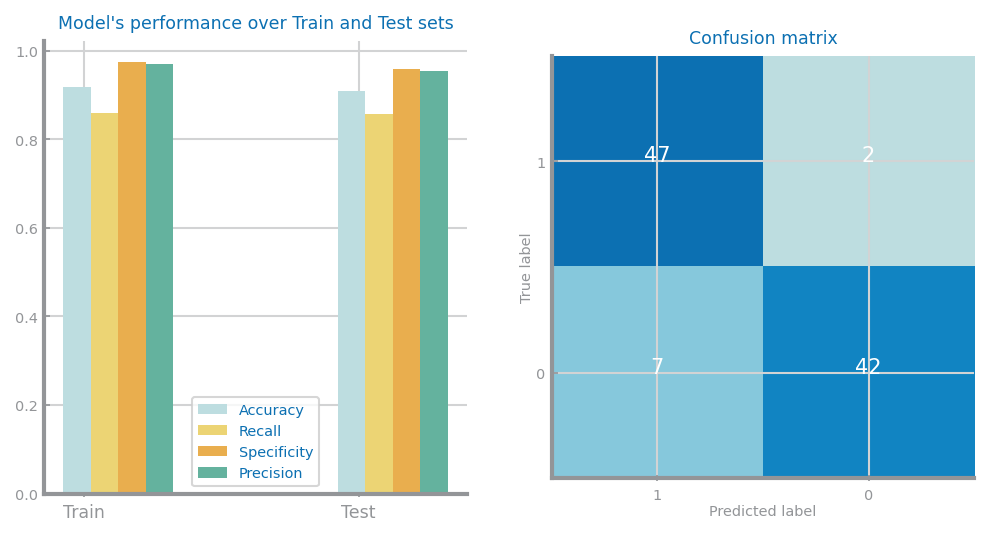

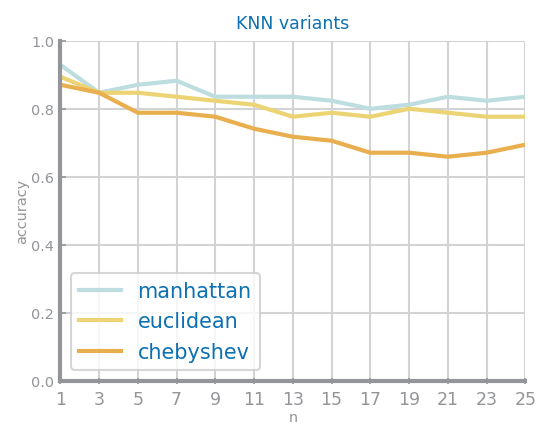

Best results with 1 neighbors and manhattan
An acc of 0.93%

 HR_S_FImp_outlierTrim_IQS_B


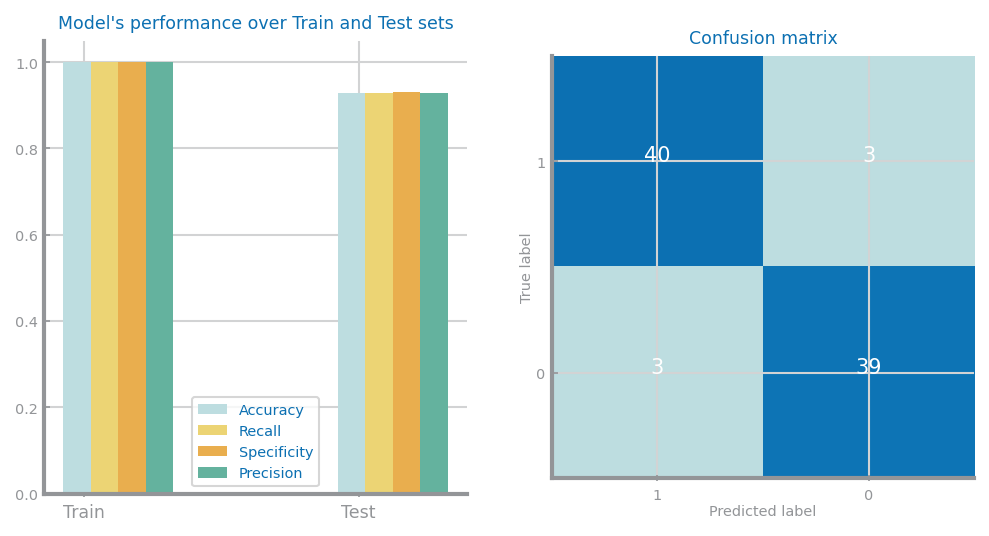

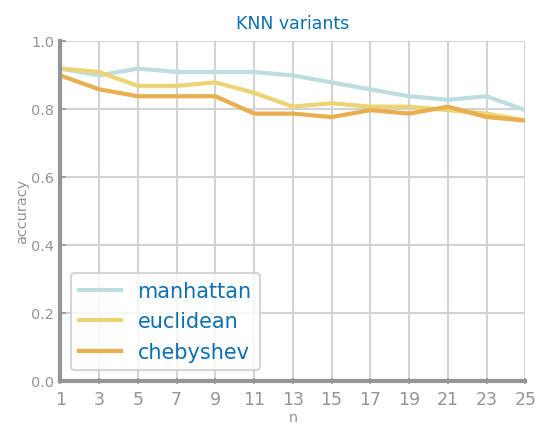

Best results with 1 neighbors and manhattan
An acc of 0.92%

 HR_S_FMixed_extra_outlierTrim_IQS_B


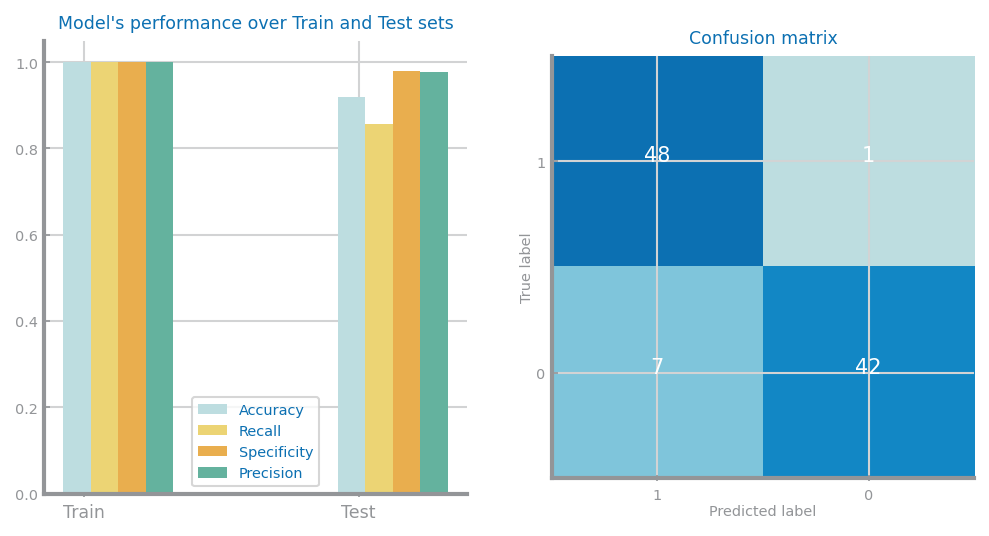

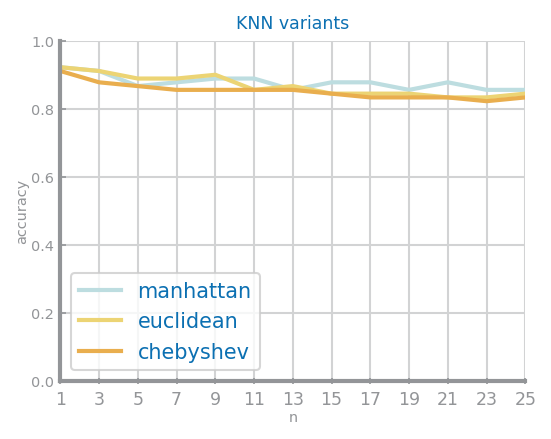

Best results with 1 neighbors and manhattan
An acc of 0.92%

 HR_S_FMixed_outlierTrim_IQS_B


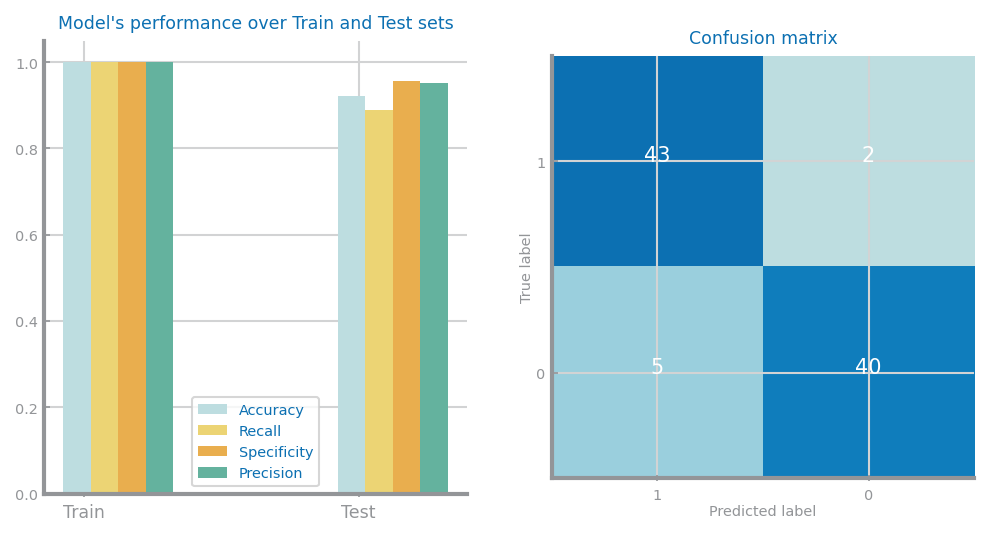

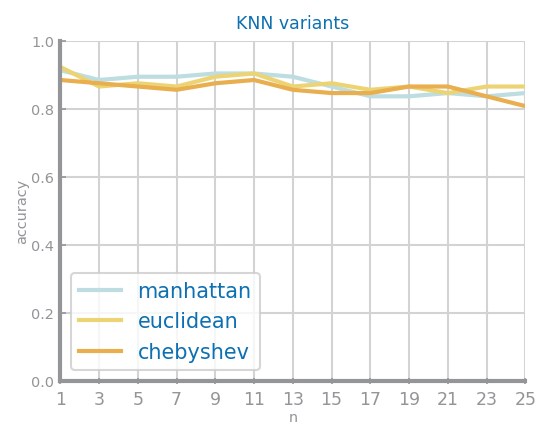

Best results with 1 neighbors and euclidean
An acc of 0.92%

 HR_S_FRFE_extra_outlierTrim_IQS_B


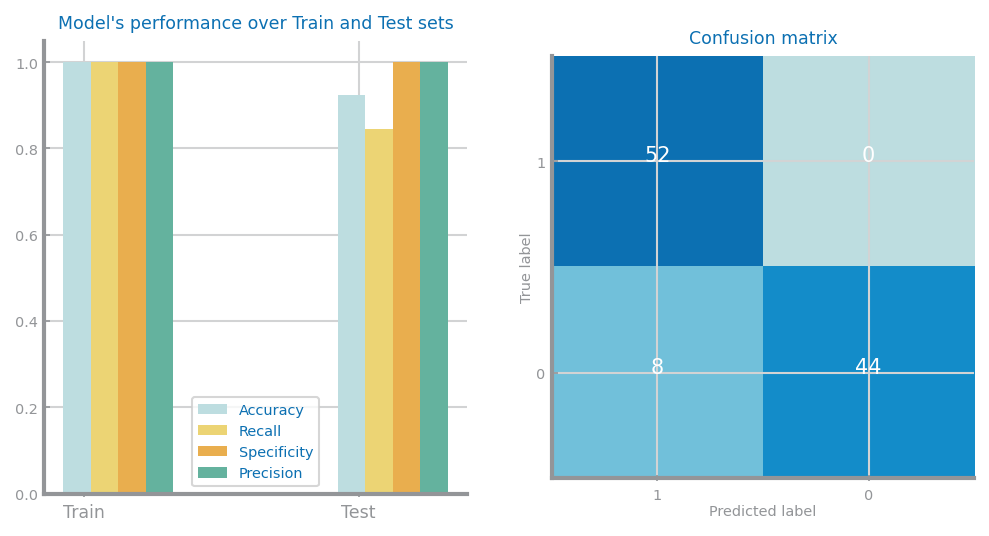

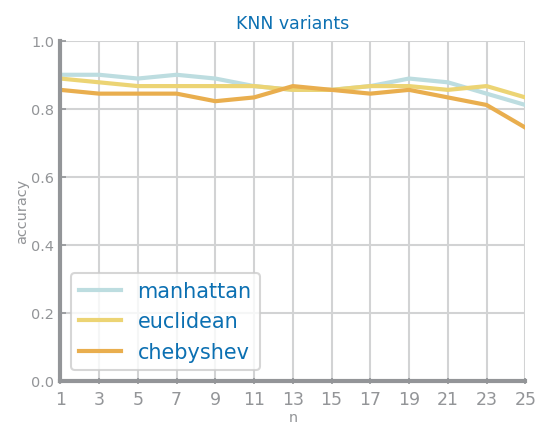

Best results with 1 neighbors and manhattan
An acc of 0.90%

 HR_S_FRFE_outlierTrim_IQS_B


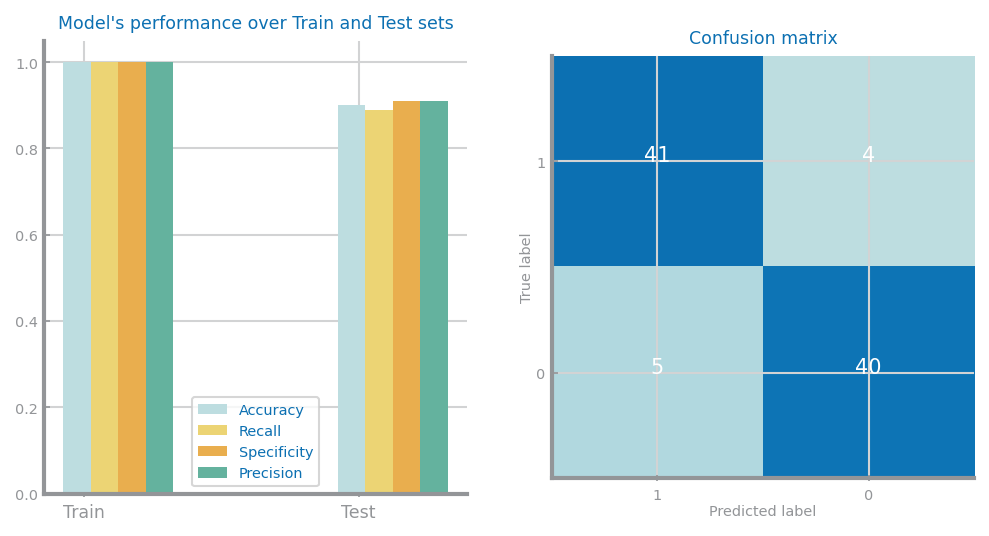

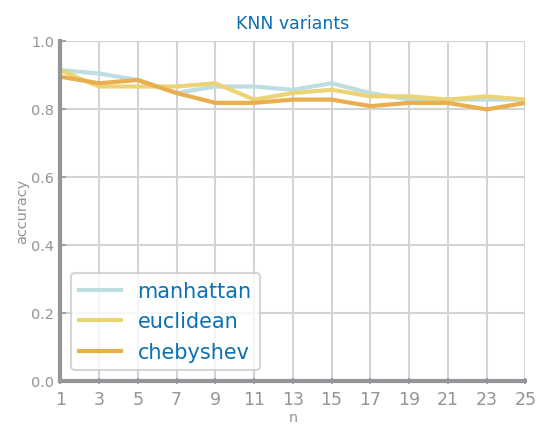

Best results with 1 neighbors and manhattan
An acc of 0.91%


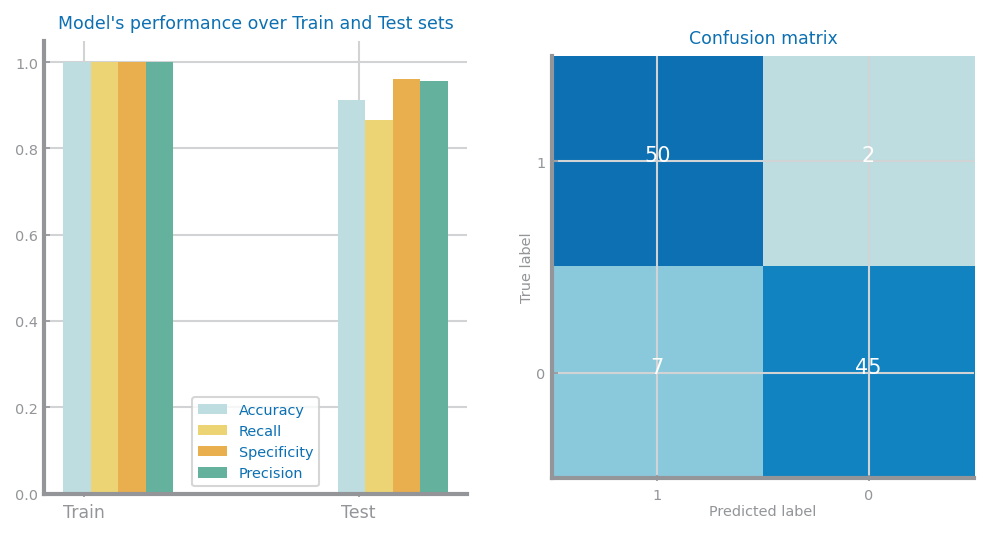

In [2]:
import os

directory = '../../datasets/TO_TEST/HF'

overall_accs = []
datasets = []

n_holdouts = 10

nvalues = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25]
dist = ['manhattan', 'euclidean', 'chebyshev']
    
for filename in os.listdir(directory):
    if filename.endswith(".csv"): 
        path = directory + '/' + filename
        print('\n', filename.split('.')[0])
        data: pd.DataFrame = pd.read_csv(path)
        y: np.ndarray = data.pop('DEATH_EVENT').values
        X: np.ndarray = data.values
        labels = pd.unique(y)
        
        trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y)
        
        values = {}
        best = (0, '')
        last_best = 0
        for d in dist:
            yvalues = []
            for n in nvalues:
                knn = KNeighborsClassifier(n_neighbors=n, metric=d)
                knn.fit(trnX, trnY)
                prdY = knn.predict(tstX)
                yvalues.append(metrics.accuracy_score(tstY, prdY))
                if yvalues[-1] > last_best:
                    best = (n, d)
                    last_best = yvalues[-1]
            values[d] = yvalues

        plt.figure()
        ds.multiple_line_chart(nvalues, values, title='KNN variants', xlabel='n', ylabel='accuracy', percentage=True)
        plt.show()
        print('Best results with %d neighbors and %s'%(best[0], best[1]))
        
        clf = knn = KNeighborsClassifier(n_neighbors=best[0], metric=best[1])
        clf.fit(trnX, trnY)
        prd_trn = clf.predict(trnX)
        prd_tst = clf.predict(tstX)
        ds.plot_evaluation_results(pd.unique(y), trnY, prd_trn, tstY, prd_tst)
        print("An acc of {:.2f}%".format(metrics.accuracy_score(tstY, prd_tst)))
        
        overall_accs += [last_best]
        # Dataset name
        datasets += [filename.split('.')[0]]

0     0.929412
1     0.923077
2     0.922222
3     0.918367
4     0.913462
5     0.908163
6     0.908163
7     0.905882
8     0.900000
9     0.882353
10    0.844444
11    0.844444
12    0.833333
13    0.833333
14    0.822222
15    0.822222
16    0.811111
17    0.811111
18    0.811111
19    0.800000
20    0.766667
21    0.631148
dtype: float64


[Text(0, 0, 'HR_S_FImp_extra_outlierTrim_IQS_B'),
 Text(0, 0, 'HR_S_FMixed_outlierTrim_IQS_B'),
 Text(0, 0, 'HR_S_FMixed_extra_outlierTrim_IQS_B'),
 Text(0, 0, 'HR_S_FImp_outlierTrim_IQS_B'),
 Text(0, 0, 'HR_S_FRFE_outlierTrim_IQS_B'),
 Text(0, 0, 'HF_S_FAnova_outlierTrim_IQS_B'),
 Text(0, 0, 'HR_S_FCorr_outlierTrim_IQS_B'),
 Text(0, 0, 'HF_S_FAnova_extra_outlierTrim_IQS_B'),
 Text(0, 0, 'HR_S_FRFE_extra_outlierTrim_IQS_B'),
 Text(0, 0, 'HR_S_FCorr_extra_outlierTrim_IQS_B'),
 Text(0, 0, 'HR_standardized_lasso'),
 Text(0, 0, 'HR_standardized_rfe'),
 Text(0, 0, 'HR_standardized_extra_mixed'),
 Text(0, 0, 'HR_standardized_extra_rfe'),
 Text(0, 0, 'HR_standardized_corr'),
 Text(0, 0, 'HR_standardized_mixed'),
 Text(0, 0, 'HR_standardized_extra'),
 Text(0, 0, 'HR_standardized_extraTreeClassifier'),
 Text(0, 0, 'HR_standardized_extra_lasso'),
 Text(0, 0, 'HR_standardized_extra_anova'),
 Text(0, 0, 'HR_standardized_anova'),
 Text(0, 0, 'HF_balanced')]

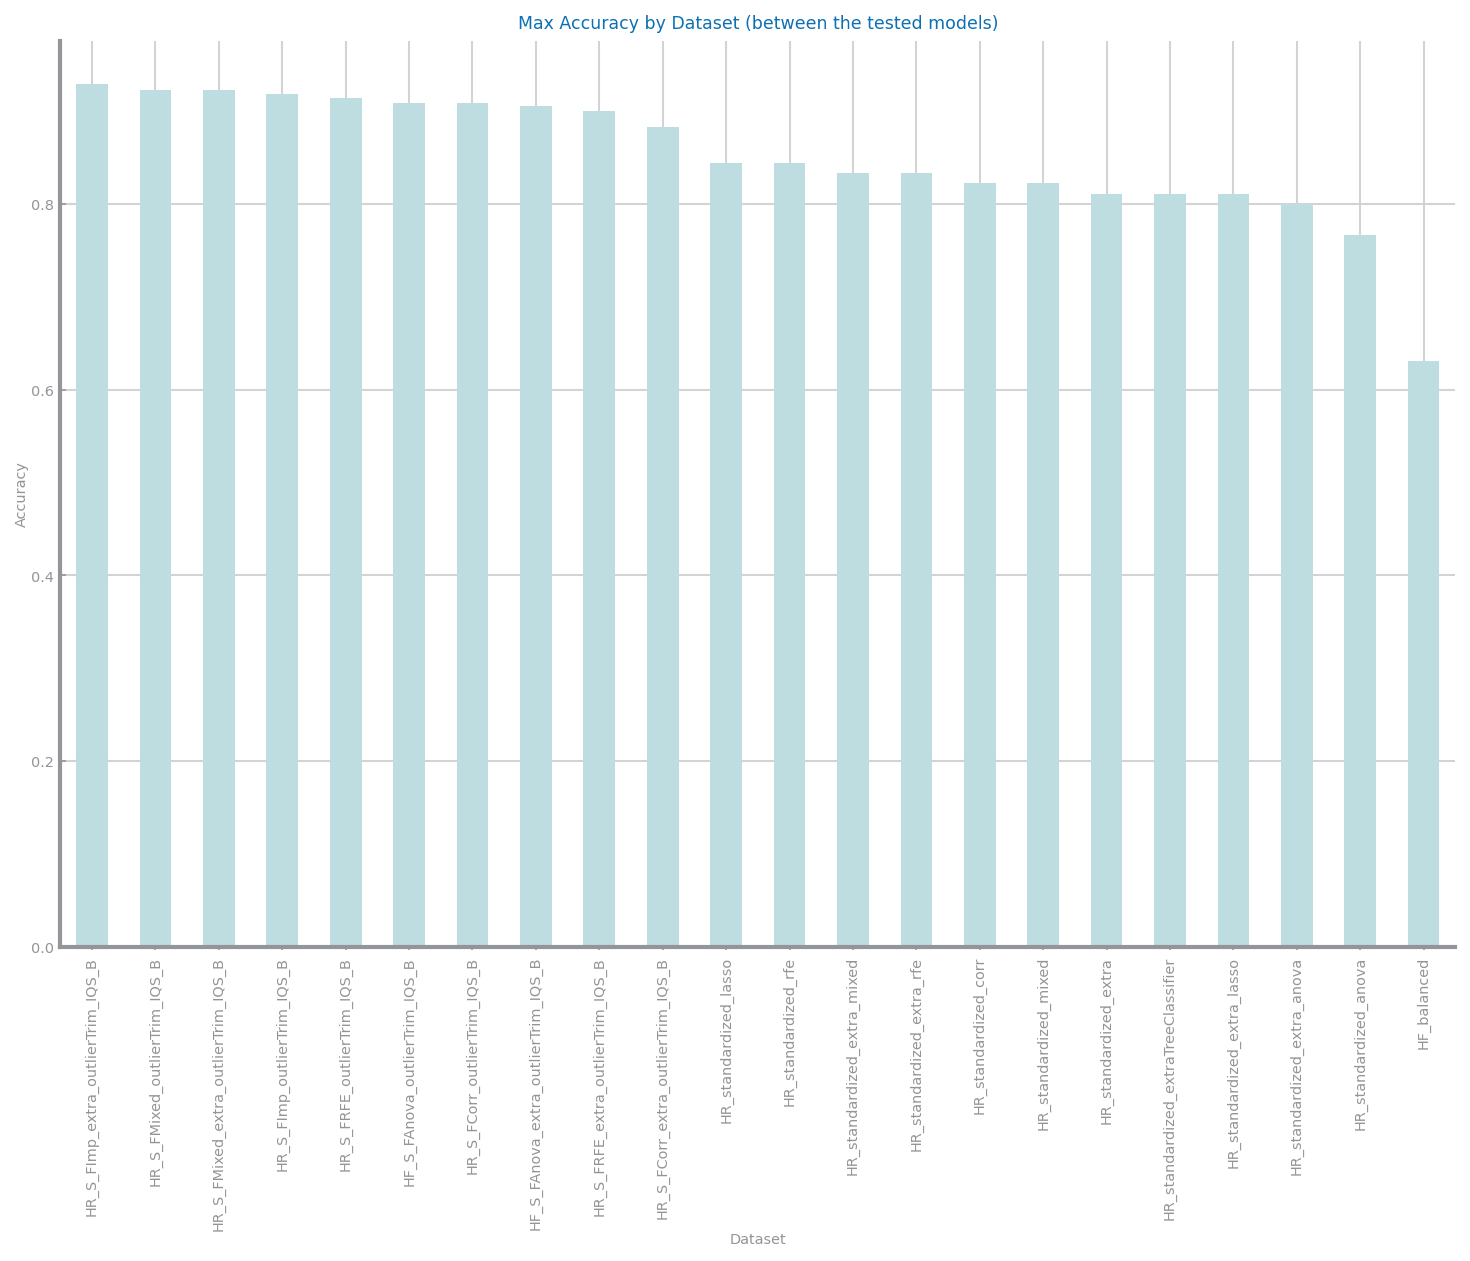

In [3]:
accs = pd.Series(overall_accs)
datasets = list(datasets)

res = {datasets[i]: overall_accs[i] for i in range(len(datasets))}

res = {k: v for k, v in sorted(res.items(), key=lambda item: item[1], reverse=True)}

accs = pd.Series(list(res.values()))

print(accs)

datasets = list(res.keys())
# Plot the figure.
plt.figure(figsize=(12, 8))
ax = accs.plot(kind='bar')
ax.set_title('Max Accuracy by Dataset (between the tested models)')
ax.set_xlabel('Dataset')
ax.set_ylabel('Accuracy')
ax.set_xticklabels(datasets)